In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [23]:
# read customers and transactions data

customers = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\customers.csv')
transactions = pd.read_csv(r'C:\Users\Nutzer\OneDrive\Desktop\viabill\transactions.csv')

# last available transaction of the client as a credit application
# select the last transaction (transactionID increases with time) for each customer in Transaction table

credit_applications = transactions.groupby(['customerID'], as_index=False).agg({'transactionID':'max'})

# join other related columns of transaction data
new_trans = credit_applications.merge(transactions[['transactionID','price', 'paytmentStatus1',
       'paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4']], on='transactionID', how='left')

# Join transactions df with customers df on customerID
df = pd.merge(new_trans, customers, on='customerID', how='left')

# Replace missing Income values with 999

df['income'] = df['income'].fillna(999)

#create “trans_price_avg_lst3” – for credit applications

df['trans_price_avg_lst3'] = df.groupby('customerID')['price'].rolling(3, min_periods=1).mean().reset_index(0, drop=True)
df['debt_to_income_ratio'] = np.where(df['income']!=999.0,df['price'] / df['income'],999) 
df['income_to_debt_ratio'] = np.where(df['income']!=999.0,df['income'] / df['price'],999) 
df['payment'] = df['price'] / 4
def income_per_age(row):
    if row['age'] <= 20:
        age_group = 1
    elif row['age'] <= 46:
        age_group = 2
    elif row['age'] <= 52:
        age_group = 3
    else:
        age_group = 4
    return row['income'] / age_group

df['income_per_age_group'] = df.apply(income_per_age, axis=1)
df['income_per_age_group'] = np.where(df['income']!=999.0,df['income_per_age_group'],999.0)

df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,residentialAddress,postalAddress,income,trans_price_avg_lst3,debt_to_income_ratio,income_to_debt_ratio,payment,income_per_age_group
0,1.0,1697842,147,0,0,0,0,1,25,28 Irvine Place,28 Irvine Place,999.0,147.0,999.000000,999.000000,36.75,999.0
1,2.0,1834257,150,0,0,0,0,1,19,72 Bertha Street,72 Bertha Street,43200.0,150.0,0.003472,288.000000,37.50,43200.0
2,3.0,1974624,140,0,0,0,0,2,22,63 Ladberry Street,63 Ladberry Street,70200.0,140.0,0.001994,501.428571,35.00,35100.0
3,4.0,1536291,136,0,1,0,0,0,24,98 Linneman Close,98 Linneman Close,93900.0,136.0,0.001448,690.441176,34.00,46950.0
4,5.0,661121,181,0,0,0,0,1,53,56 Salonica Road,56 Salonica Road,77000.0,181.0,0.002351,425.414365,45.25,19250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,95 Argyle Parade,95 Argyle Parade,40500.0,27.0,0.000667,1500.000000,6.75,10125.0
490529,499997.0,1756533,127,0,0,1,0,2,22,34 Bearke Place,34 Bearke Place,44900.0,127.0,0.002829,353.543307,31.75,22450.0
490530,499998.0,1628579,157,0,0,0,0,1,27,95 Glenhurst Street,95 Glenhurst Street,48700.0,157.0,0.003224,310.191083,39.25,24350.0
490531,499999.0,1722718,171,0,0,0,0,1,55,34 Kiandra Close,34 Kiandra Close,7600.0,171.0,0.022500,44.444444,42.75,1900.0


In [24]:
# drop adress columns
# we could create region variable out of adresses in future

df.drop(columns=['residentialAddress', 'postalAddress'], axis=1, inplace=True)

# we have payment status for 4 weeks. i combined each row together in order to see behavior of customer at end of the month
df['combined'] = df['paytmentStatus1'].astype(str) + df['paytmentStatus2'].astype(str) + df['paytmentStatus3'].astype(str) + df['paytmentStatus4'].astype(str)

# got results as 0010, 0002 and etc.
df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,debt_to_income_ratio,income_to_debt_ratio,payment,income_per_age_group,combined
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,999.000000,999.000000,36.75,999.0,0000
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0.003472,288.000000,37.50,43200.0,0000
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0.001994,501.428571,35.00,35100.0,0000
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0.001448,690.441176,34.00,46950.0,0100
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0.002351,425.414365,45.25,19250.0,0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0.000667,1500.000000,6.75,10125.0,0000
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0.002829,353.543307,31.75,22450.0,0010
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0.003224,310.191083,39.25,24350.0,0000
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0.022500,44.444444,42.75,1900.0,0000


In [25]:
def check_default(combined):
    if '2' and '1' in combined:
        return 1
    else:
        return 0
# Apply function to create default column
df['default'] = df['combined'].apply(check_default)


df

,customerID,transactionID,price,paytmentStatus1,paytmentStatus2,paytmentStatus3,paytmentStatus4,sex,age,income,trans_price_avg_lst3,debt_to_income_ratio,income_to_debt_ratio,payment,income_per_age_group,combined,default
0,1.0,1697842,147,0,0,0,0,1,25,999.0,147.0,999.000000,999.000000,36.75,999.0,0000,0
1,2.0,1834257,150,0,0,0,0,1,19,43200.0,150.0,0.003472,288.000000,37.50,43200.0,0000,0
2,3.0,1974624,140,0,0,0,0,2,22,70200.0,140.0,0.001994,501.428571,35.00,35100.0,0000,0
3,4.0,1536291,136,0,1,0,0,0,24,93900.0,136.0,0.001448,690.441176,34.00,46950.0,0100,1
4,5.0,661121,181,0,0,0,0,1,53,77000.0,181.0,0.002351,425.414365,45.25,19250.0,0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490528,499996.0,665043,27,0,0,0,0,1,68,40500.0,27.0,0.000667,1500.000000,6.75,10125.0,0000,0
490529,499997.0,1756533,127,0,0,1,0,2,22,44900.0,127.0,0.002829,353.543307,31.75,22450.0,0010,1
490530,499998.0,1628579,157,0,0,0,0,1,27,48700.0,157.0,0.003224,310.191083,39.25,24350.0,0000,0
490531,499999.0,1722718,171,0,0,0,0,1,55,7600.0,171.0,0.022500,44.444444,42.75,1900.0,0000,0


In [26]:
df['default'].value_counts()

0    346265
1    144268
Name: default, dtype: int64

In [27]:
df.drop(columns=['paytmentStatus1','paytmentStatus2', 'paytmentStatus3', 'paytmentStatus4','combined'],axis=1,inplace=True)

In [28]:
df['customerID'] = df['customerID'].astype(int)
df['customerID'] = df['customerID'].astype(str).str.zfill(7)
df['transactionID'] = df['transactionID'].astype(str)

df

# last version of data is as below. 
# CustomerID and TransactionID will not be used in modeling

,customerID,transactionID,price,sex,age,income,trans_price_avg_lst3,debt_to_income_ratio,income_to_debt_ratio,payment,income_per_age_group,default
0,0000001,1697842,147,1,25,999.0,147.0,999.000000,999.000000,36.75,999.0,0
1,0000002,1834257,150,1,19,43200.0,150.0,0.003472,288.000000,37.50,43200.0,0
2,0000003,1974624,140,2,22,70200.0,140.0,0.001994,501.428571,35.00,35100.0,0
3,0000004,1536291,136,0,24,93900.0,136.0,0.001448,690.441176,34.00,46950.0,1
4,0000005,661121,181,1,53,77000.0,181.0,0.002351,425.414365,45.25,19250.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
490528,0499996,665043,27,1,68,40500.0,27.0,0.000667,1500.000000,6.75,10125.0,0
490529,0499997,1756533,127,2,22,44900.0,127.0,0.002829,353.543307,31.75,22450.0,1
490530,0499998,1628579,157,1,27,48700.0,157.0,0.003224,310.191083,39.25,24350.0,0
490531,0499999,1722718,171,1,55,7600.0,171.0,0.022500,44.444444,42.75,1900.0,0


In [9]:
# Check if there is a dependency between age and sex in the data

from scipy.stats import pearsonr

corr, p_value = pearsonr(df['sex'], df['age'])
print('correlation coef: ',corr)
print('p value: ', p_value)

#we can conclude that there is a too very weak positive correlation between age and sex
# p value considered to be lower than 0.05, hence this correlation is statistically not significant at the 0.31 level.

correlation coef:  0.001435107992500123
p value:  0.3148391817015066


In [29]:
df.columns

Index(['customerID', 'transactionID', 'price', 'sex', 'age', 'income',
       'trans_price_avg_lst3', 'debt_to_income_ratio', 'income_to_debt_ratio',
       'payment', 'income_per_age_group', 'default'],
      dtype='object')

In [30]:
# change position of columns 

cols = ['customerID', 'transactionID', 'default', 'trans_price_avg_lst3','income_to_debt_ratio', 'payment',
       'income_per_age_group']

df = df[cols]

df

,customerID,transactionID,default,trans_price_avg_lst3,income_to_debt_ratio,payment,income_per_age_group
0,0000001,1697842,0,147.0,999.000000,36.75,999.0
1,0000002,1834257,0,150.0,288.000000,37.50,43200.0
2,0000003,1974624,0,140.0,501.428571,35.00,35100.0
3,0000004,1536291,1,136.0,690.441176,34.00,46950.0
4,0000005,661121,0,181.0,425.414365,45.25,19250.0
...,...,...,...,...,...,...,...
490528,0499996,665043,0,27.0,1500.000000,6.75,10125.0
490529,0499997,1756533,1,127.0,353.543307,31.75,22450.0
490530,0499998,1628579,0,157.0,310.191083,39.25,24350.0
490531,0499999,1722718,0,171.0,44.444444,42.75,1900.0


In [31]:
from optbinning import OptimalBinning
import math

In [32]:
numer_vl = df.iloc[:,3:]
numer_vl

,trans_price_avg_lst3,income_to_debt_ratio,payment,income_per_age_group
0,147.0,999.000000,36.75,999.0
1,150.0,288.000000,37.50,43200.0
2,140.0,501.428571,35.00,35100.0
3,136.0,690.441176,34.00,46950.0
4,181.0,425.414365,45.25,19250.0
...,...,...,...,...
490528,27.0,1500.000000,6.75,10125.0
490529,127.0,353.543307,31.75,22450.0
490530,157.0,310.191083,39.25,24350.0
490531,171.0,44.444444,42.75,1900.0



 var:  trans_price_avg_lst3


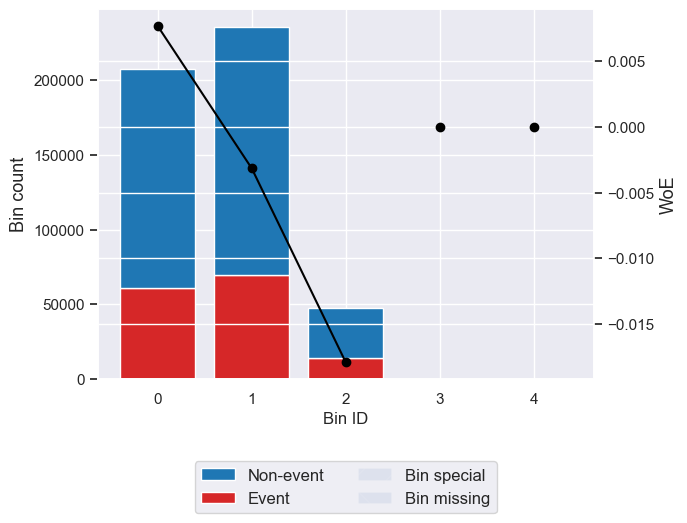


 BINNING TABLE:  
                     Bin   Count  Count (%)  Non-event   Event  Event rate  \
0         (-inf, 86.50)  207758   0.423535     146986   60772    0.292513   
1       [86.50, 181.50)  235467   0.480023     166061   69406    0.294759   
2         [181.50, inf)   47308   0.096442      33218   14090    0.297835   
3               Special       0   0.000000          0       0    0.000000   
4               Missing       0   0.000000          0       0    0.000000   
Totals                   490533   1.000000     346265  144268    0.294105   

             WoE        IV            JS  
0       0.007676  0.000025  3.114841e-06  
1       -0.00315  0.000005  5.956978e-07  
2      -0.017905  0.000031  3.878981e-06  
3            0.0  0.000000  0.000000e+00  
4            0.0  0.000000  0.000000e+00  
Totals            0.000061  7.589520e-06  

 SPLITS:  [-inf, 86.5, 181.5, inf]

 WOE 
 [0.007676490669327185 -0.0031498252687990336 -0.017905125130997734 0.0]

 ---------------------

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_8140\1268913978.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  optb_bin_iv_js = optb_bin_iv_js.append({'var': i, 'iv': float(bin_tbl[-1:]['IV'])}, ignore_index=True)


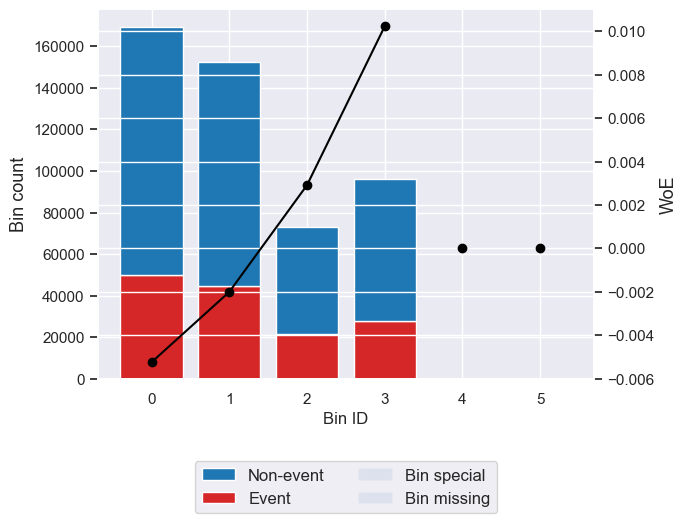


 BINNING TABLE:  
                       Bin   Count  Count (%)  Non-event   Event  Event rate  \
0          (-inf, 346.28)  169123   0.344774     119199   49924    0.295193   
1        [346.28, 733.46)  152397   0.310676     107513   44884    0.294520   
2       [733.46, 1185.97)   73046   0.148911      51607   21439    0.293500   
3          [1185.97, inf)   95967   0.195638      67946   28021    0.291986   
4                 Special       0   0.000000          0       0    0.000000   
5                 Missing       0   0.000000          0       0    0.000000   
Totals                     490533   1.000000     346265  144268    0.294105   

             WoE        IV            JS  
0      -0.005239  0.000009  1.184237e-06  
1      -0.002001  0.000001  1.556058e-07  
2       0.002914  0.000001  1.579560e-07  
3       0.010227  0.000020  2.552527e-06  
4            0.0  0.000000  0.000000e+00  
5            0.0  0.000000  0.000000e+00  
Totals            0.000032  4.050325e-06  

 S

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_8140\1268913978.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  optb_bin_iv_js = optb_bin_iv_js.append({'var': i, 'iv': float(bin_tbl[-1:]['IV'])}, ignore_index=True)


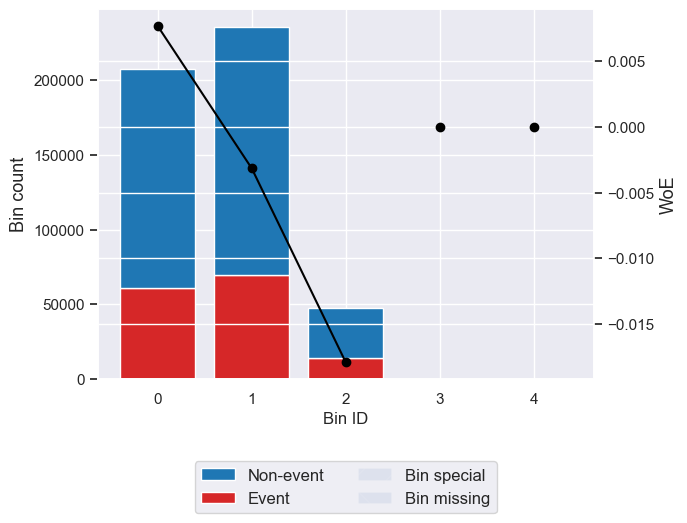


 BINNING TABLE:  
                    Bin   Count  Count (%)  Non-event   Event  Event rate  \
0        (-inf, 21.62)  207758   0.423535     146986   60772    0.292513   
1       [21.62, 45.38)  235467   0.480023     166061   69406    0.294759   
2         [45.38, inf)   47308   0.096442      33218   14090    0.297835   
3              Special       0   0.000000          0       0    0.000000   
4              Missing       0   0.000000          0       0    0.000000   
Totals                  490533   1.000000     346265  144268    0.294105   

             WoE        IV            JS  
0       0.007676  0.000025  3.114841e-06  
1       -0.00315  0.000005  5.956978e-07  
2      -0.017905  0.000031  3.878981e-06  
3            0.0  0.000000  0.000000e+00  
4            0.0  0.000000  0.000000e+00  
Totals            0.000061  7.589520e-06  

 SPLITS:  [-inf, 21.625, 45.375, inf]

 WOE 
 [0.007676490669327185 -0.0031498252687990336 -0.017905125130997734 0.0]

 -------------------------

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_8140\1268913978.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  optb_bin_iv_js = optb_bin_iv_js.append({'var': i, 'iv': float(bin_tbl[-1:]['IV'])}, ignore_index=True)


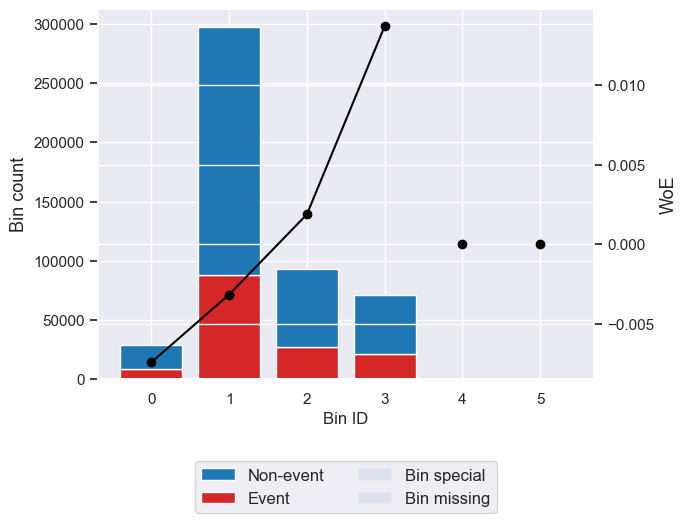


 BINNING TABLE:  
                          Bin   Count  Count (%)  Non-event   Event  \
0            (-inf, 1329.17)   28592   0.058288      20139    8453   
1        [1329.17, 22529.17)  297522   0.606528     209825   87697   
2       [22529.17, 35325.00)   93053   0.189698      65722   27331   
3            [35325.00, inf)   71366   0.145487      50579   20787   
4                    Special       0   0.000000          0       0   
5                    Missing       0   0.000000          0       0   
Totals                        490533   1.000000     346265  144268   

        Event rate       WoE            IV            JS  
0         0.295642 -0.007395  3.192253e-06  3.990307e-07  
1         0.294758 -0.003146  6.005121e-06  7.506399e-07  
2         0.293714   0.00188  6.705209e-07  8.381510e-08  
3         0.291273  0.013677  2.713786e-05  3.392207e-06  
4         0.000000       0.0  0.000000e+00  0.000000e+00  
5         0.000000       0.0  0.000000e+00  0.000000e+00  
Totals

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_8140\1268913978.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  optb_bin_iv_js = optb_bin_iv_js.append({'var': i, 'iv': float(bin_tbl[-1:]['IV'])}, ignore_index=True)


In [34]:
y = df['default'].values.astype('float')

data_bin_optb = pd.DataFrame()
optb_bin_iv_js = pd.DataFrame(columns = ['var', 'iv']) 

data_bin_optb['y'] = y

d_splits = dict()
d_woe = dict()


for i in numer_vl: 
    
    
    print('\n', "var: ", i)

    x = df[i].values.astype('float64') 
    
    
    optb = OptimalBinning(dtype="numerical", solver="cp"
                          , divergence = 'iv' 
                          , max_n_bins= 5  
                          
                          , min_bin_size = 0.05 
                          
                          , min_bin_n_nonevent = 1
                          , min_bin_n_event = 1 
                          
                          , monotonic_trend = 'auto_asc_desc' 
                           )
    optb.fit(x, y)
    
    
    binning_table = optb.binning_table
    type(binning_table)
    bin_tbl = pd.DataFrame(binning_table.build())

    binning_table.plot(metric="woe")

    print('\n', "BINNING TABLE: ", '\n', bin_tbl)
    

    optb_bin_iv_js = optb_bin_iv_js.append({'var': i, 'iv': float(bin_tbl[-1:]['IV'])}, ignore_index=True)

    arr = optb.splits 
    arr = [-math.inf, *arr]
    arr = [*arr, math.inf]
    print('\n', "SPLITS: ", arr) 

    d_splits[i] = arr
    
    
    woe_list = bin_tbl['WoE'].head(len(arr)-1)
    woe_list = np.concatenate((woe_list, [float(bin_tbl[-2:-1]['WoE'])]))
    
    d_woe[i] = woe_list
    
    
    print('\n', "WOE", '\n', woe_list)

    binned_column = []
    binned_column = pd.cut(x, bins = arr, labels = bin_tbl['WoE'].head(len(arr)-1))    
    binned_column = binned_column.add_categories(float(bin_tbl[-2:-1]['WoE'])).fillna(float(bin_tbl[-2:-1]['WoE']))
    data_bin_optb[i] = binned_column
    
    
    print('\n', '-----------------------------------------', '\n')

bin_arrays = pd.DataFrame.from_dict(d_splits, orient='index').transpose()
woe_arrays = pd.DataFrame.from_dict(d_woe, orient='index').transpose()


In [35]:
bin_arrays

,trans_price_avg_lst3,income_to_debt_ratio,payment,income_per_age_group
0,-inf,-inf,-inf,-inf
1,86.5,346.283356,21.625,1.329167e+03
2,181.5,733.457703,45.375,2.252917e+04
3,inf,1185.968750,inf,3.532500e+04
4,NaN,inf,NaN,inf


In [36]:
woe_arrays

,trans_price_avg_lst3,income_to_debt_ratio,payment,income_per_age_group
0,0.007676,-0.005239,0.007676,-0.007395
1,-0.003150,-0.002001,-0.003150,-0.003146
2,-0.017905,0.002914,-0.017905,0.001880
3,0.000000,0.010227,0.000000,0.013677
4,NaN,0.000000,NaN,0.000000


In [37]:
# replace normal values with woe values

fl=df.iloc[:, 3:]
data_full_binned = df.iloc[:, :3]

for i in fl:
    print(i)
    binned_column = []       
    binned_column = pd.cut(df[i].astype('float')
                           , bins = bin_arrays[i].dropna()
                           , labels = woe_arrays[:len(bin_arrays[i].dropna())-1][i]
                          )   

    if binned_column.isnull().values.any():
        
        binned_column = binned_column.cat.add_categories(float(woe_arrays[i].dropna().tail(1))).fillna(float(woe_arrays[i].dropna().tail(1)))

    data_full_binned[i] = binned_column
    print('\n', '-----------------------')
   

trans_price_avg_lst3

 -----------------------
income_to_debt_ratio

 -----------------------
payment

 -----------------------
income_per_age_group

 -----------------------


In [38]:
data_full_binned

# Now we got df with woe transformed values

,customerID,transactionID,default,trans_price_avg_lst3,income_to_debt_ratio,payment,income_per_age_group
0,0000001,1697842,0,-0.003150,0.002914,-0.003150,-0.007395
1,0000002,1834257,0,-0.003150,-0.005239,-0.003150,0.013677
2,0000003,1974624,0,-0.003150,-0.002001,-0.003150,0.001880
3,0000004,1536291,1,-0.003150,-0.002001,-0.003150,0.013677
4,0000005,661121,0,-0.003150,-0.002001,-0.003150,-0.003146
...,...,...,...,...,...,...,...
490528,0499996,665043,0,0.007676,0.010227,0.007676,-0.003146
490529,0499997,1756533,1,-0.003150,-0.002001,-0.003150,-0.003146
490530,0499998,1628579,0,-0.003150,-0.005239,-0.003150,0.001880
490531,0499999,1722718,0,-0.003150,-0.005239,-0.003150,-0.003146


In [39]:
cols_to_convert = ['income_per_age_group', 'payment', 'income_to_debt_ratio','trans_price_avg_lst3']

for col in cols_to_convert:
    data_full_binned[col] = data_full_binned[col].astype(float)


In [54]:
# checking with all independent variables
# due to less amount of features i dont want to use feature importance and lower it. 

X = data_full_binned[['income_per_age_group', 'payment', 'income_to_debt_ratio','trans_price_avg_lst3']]
y = data_full_binned[['default']]

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt

In [83]:
# some of the models i consider to use

models = [LogisticRegression(),XGBClassifier(),LGBMClassifier(),RandomForestClassifier(), LogisticRegression(class_weight='balanced')]

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LogisticRegression()
[[103696      0]
 [ 43464      0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.70      1.00      0.83    103696
           1       0.00      0.00      0.00     43464

    accuracy                           0.70    147160
   macro avg       0.35      0.50      0.41    147160
weighted avg       0.50      0.70      0.58    147160

                                      
AUC Score: 50.26603167861895
Gini prob is 0.5320633572378997


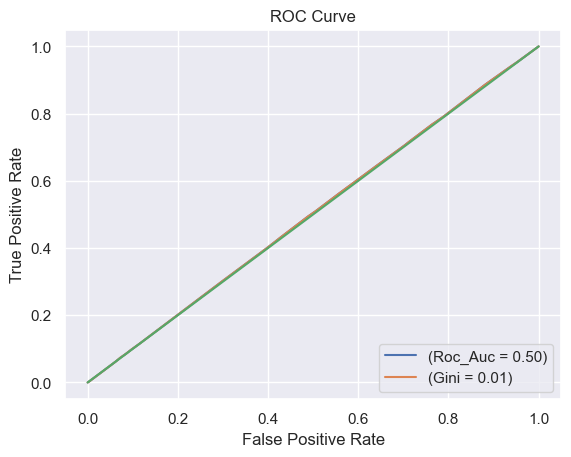

                                      
Model Performance for XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)
[[103696      0]
 [ 43464      0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.70      1.00      0.83    103696
           1       0.00      0.00      0.00     43464

    accuracy                           0.70    147160
   macro avg       0.35      0.50      0.41    147160
weighted avg       0.50      0.70      0.58    147160

                                      
AUC Score: 49.996775269244026
Gini prob is -0.00644946151194814


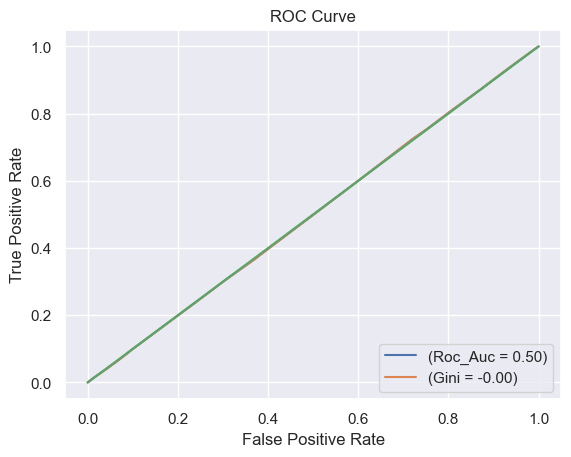

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LGBMClassifier()
[[103696      0]
 [ 43464      0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.70      1.00      0.83    103696
           1       0.00      0.00      0.00     43464

    accuracy                           0.70    147160
   macro avg       0.35      0.50      0.41    147160
weighted avg       0.50      0.70      0.58    147160

                                      
AUC Score: 49.996560627401905
Gini prob is -0.006878745196192693


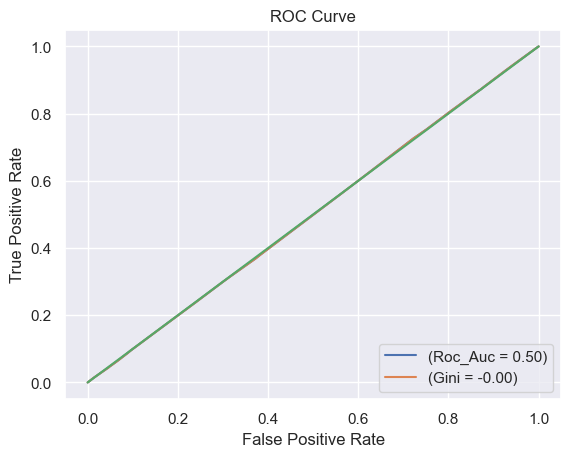

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_8140\595111715.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  models.fit(X_train, y_train)


Model Performance for RandomForestClassifier()
[[103696      0]
 [ 43464      0]]


C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.70      1.00      0.83    103696
           1       0.00      0.00      0.00     43464

    accuracy                           0.70    147160
   macro avg       0.35      0.50      0.41    147160
weighted avg       0.50      0.70      0.58    147160

                                      
AUC Score: 49.99971125191924
Gini prob is -0.0005774961615245822


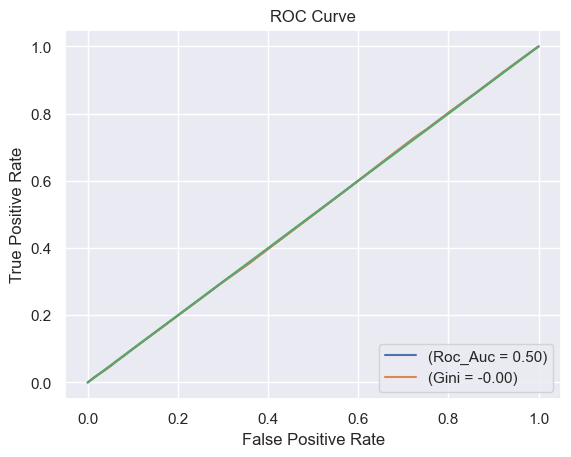

C:\Users\Nutzer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Performance for LogisticRegression(class_weight='balanced')
[[49638 54058]
 [20642 22822]]
              precision    recall  f1-score   support

           0       0.71      0.48      0.57    103696
           1       0.30      0.53      0.38     43464

    accuracy                           0.49    147160
   macro avg       0.50      0.50      0.47    147160
weighted avg       0.59      0.49      0.51    147160

                                      
AUC Score: 50.29031130083681
Gini prob is 0.5806226016736193


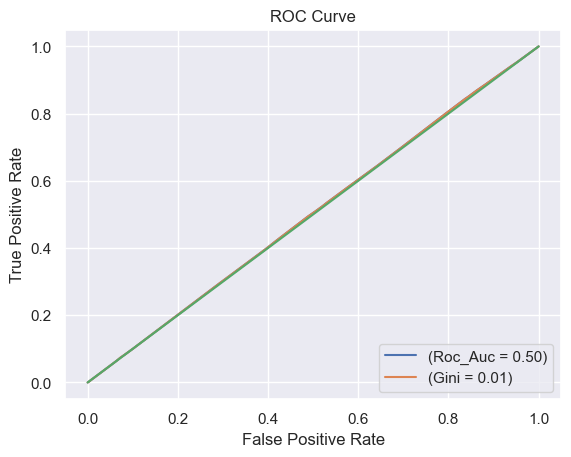

In [84]:
# Building a loop where all performance measures will be calculated for each ML model

# Confusion matrix
# Classification table
# Roc_auc_score
# Gini coefficient
# Roc curve


for i in models:
    models=i
    models.fit(X_train, y_train)
    
    y_pred = models.predict(X_test)
    y_prob = models.predict_proba(X_test)[:,1]


    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    
    plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_prob)
    plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini_prob)
    plt.plot([0, 1], [0, 1])
    plt.xlim()
    plt.ylim()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    
    print('Model Performance for',i)    
   
    print(confusion_matrix)
    print(classification_report(y_test, y_pred))
    print("                                      ")
    print('AUC Score:', roc_auc_score(y_test, y_prob)*100)
    print('Gini prob is', gini_prob*100)
    plt.show()
    print("="*70)
    print("                                      ")

## Let us consider univariate gini for each feature too and see which variable gives us best gini

In [85]:
development = X_train.join(y_train)
development['tag'] = 'DEV'
development

,income_per_age_group,payment,income_to_debt_ratio,trans_price_avg_lst3,default,tag
180991,-0.003146,-0.003150,-0.005239,-0.003150,0,DEV
426265,-0.003146,-0.003150,-0.005239,-0.003150,0,DEV
456227,-0.003146,-0.003150,-0.005239,-0.003150,0,DEV
219405,-0.003146,-0.003150,-0.005239,-0.003150,1,DEV
469171,0.001880,0.007676,0.002914,0.007676,0,DEV
...,...,...,...,...,...,...
259178,-0.003146,-0.003150,-0.005239,-0.003150,0,DEV
365838,0.013677,0.007676,0.002914,0.007676,0,DEV
131932,-0.003146,0.007676,0.010227,0.007676,0,DEV
146867,-0.007395,0.007676,-0.005239,0.007676,0,DEV


In [86]:
validation = X_test.join(y_test)
validation['tag'] = 'VAL'
validation

,income_per_age_group,payment,income_to_debt_ratio,trans_price_avg_lst3,default,tag
155664,0.013677,-0.003150,-0.002001,-0.003150,0,VAL
108339,-0.003146,0.007676,-0.005239,0.007676,1,VAL
194854,-0.003146,-0.003150,-0.005239,-0.003150,0,VAL
53680,-0.003146,0.007676,0.010227,0.007676,0,VAL
430837,0.001880,-0.003150,-0.002001,-0.003150,0,VAL
...,...,...,...,...,...,...
80515,0.001880,0.007676,0.002914,0.007676,0,VAL
326730,-0.003146,-0.003150,-0.005239,-0.003150,0,VAL
427533,-0.003146,-0.003150,-0.002001,-0.003150,1,VAL
394268,-0.003146,-0.003150,-0.002001,-0.003150,1,VAL


In [87]:
ls=[development,validation]
data_full = pd.concat(ls,axis=0)

In [88]:
data_full

# concat splitted data and added tag column in order to recognize splits

,income_per_age_group,payment,income_to_debt_ratio,trans_price_avg_lst3,default,tag
180991,-0.003146,-0.003150,-0.005239,-0.003150,0,DEV
426265,-0.003146,-0.003150,-0.005239,-0.003150,0,DEV
456227,-0.003146,-0.003150,-0.005239,-0.003150,0,DEV
219405,-0.003146,-0.003150,-0.005239,-0.003150,1,DEV
469171,0.001880,0.007676,0.002914,0.007676,0,DEV
...,...,...,...,...,...,...
80515,0.001880,0.007676,0.002914,0.007676,0,VAL
326730,-0.003146,-0.003150,-0.005239,-0.003150,0,VAL
427533,-0.003146,-0.003150,-0.002001,-0.003150,1,VAL
394268,-0.003146,-0.003150,-0.002001,-0.003150,1,VAL


In [89]:
vars_list = ['income_per_age_group', 'payment', 'income_to_debt_ratio', 'trans_price_avg_lst3']

In [90]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# univariate gini will be calculated for each independent feature vs target variable in a loop

In [91]:
gini_dev = pd.DataFrame(columns = ('var', 'gini'))
print('development')
for i in range(len(vars_list)):

    x = data_full[data_full['tag'] == 'DEV'][[vars_list[i]]]
    y_train = data_full[data_full['tag'] == 'DEV']['default']

    logreg.fit(x, y_train)
    y_pred = logreg.predict_proba(x)[:,1]
    gini_dev.loc[i] = [vars_list[i], 2*metrics.roc_auc_score(y_train, y_pred)-1]
gini_dev

development


,var,gini
0,income_per_age_group,0.002303
1,payment,0.003568
2,income_to_debt_ratio,0.003040
3,trans_price_avg_lst3,0.003568


In [92]:
gini_val = pd.DataFrame(columns = ('var', 'gini'))
print('validation')
for i in range(len(vars_list)):

    x = data_full[data_full['tag'] == 'VAL'][[vars_list[i]]]
    y_train = data_full[data_full['tag'] == 'VAL']['default']

    logreg.fit(x, y_train)
    y_pred = logreg.predict_proba(x)[:,1]
    gini_val.loc[i] = [vars_list[i], 2*metrics.roc_auc_score(y_train, y_pred)-1]
    
gini_val

validation


,var,gini
0,income_per_age_group,0.003998
1,payment,0.004778
2,income_to_debt_ratio,0.002878
3,trans_price_avg_lst3,0.004778


In [93]:
gini_dev_val = gini_dev.merge(gini_val,on='var',how='left')
gini_dev_val = gini_dev_val.rename(columns = {'gini_x':'DEV_gini','gini_y':'VAL_gini'})

gini_dev_val

,var,DEV_gini,VAL_gini
0,income_per_age_group,0.002303,0.003998
1,payment,0.003568,0.004778
2,income_to_debt_ratio,0.003040,0.002878
3,trans_price_avg_lst3,0.003568,0.004778
